In [605]:
#usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [606]:
#geopandas
import geopandas

In [607]:
#dataset
chipotle = pd.read_csv("../datasets/chipotle_stores.csv")

## First Contact

In [608]:
chipotle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629 entries, 0 to 2628
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      2629 non-null   object 
 1   location   2629 non-null   object 
 2   address    2629 non-null   object 
 3   latitude   2629 non-null   float64
 4   longitude  2629 non-null   float64
dtypes: float64(2), object(3)
memory usage: 102.8+ KB


In [609]:
chipotle.head()

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220


In [610]:
# Create a copy of the original DataFrame
chipotle_by_state = chipotle.copy()
# Add a new column and set the value to 1
chipotle_by_state['chipotle_count'] = 1

# use groupby() and count() to total up all the chipotle by state
chipotle_by_state = chipotle_by_state[['state',"chipotle_count"]].groupby('state').count()

# sort by most chipotle_count first
chipotle_by_state.sort_values('chipotle_count', ascending=False).head(10)

,chipotle_count
state,
California,421
Texas,226
Ohio,193
Florida,177
New York,160
Illinois,144
Virginia,107
Pennsylvania,96
Maryland,94


<AxesSubplot:ylabel='state'>

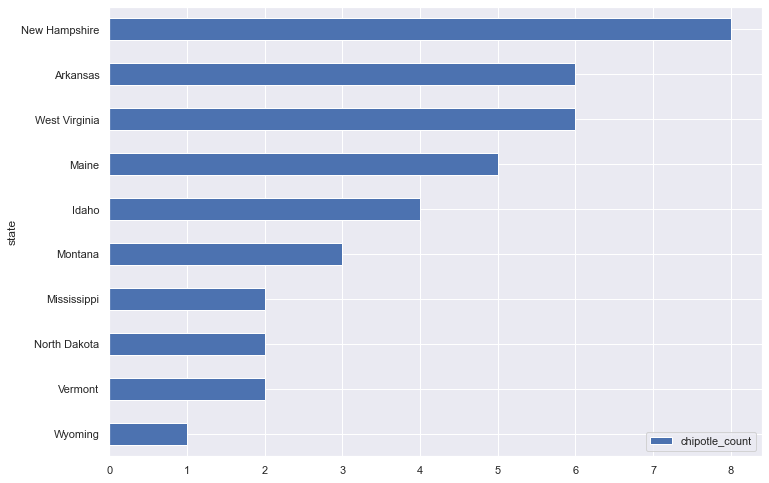

In [611]:
chipotle_by_state.sort_values('chipotle_count', ascending=True)[:10].plot(kind="barh") #States with the less chipotles

<AxesSubplot:ylabel='state'>

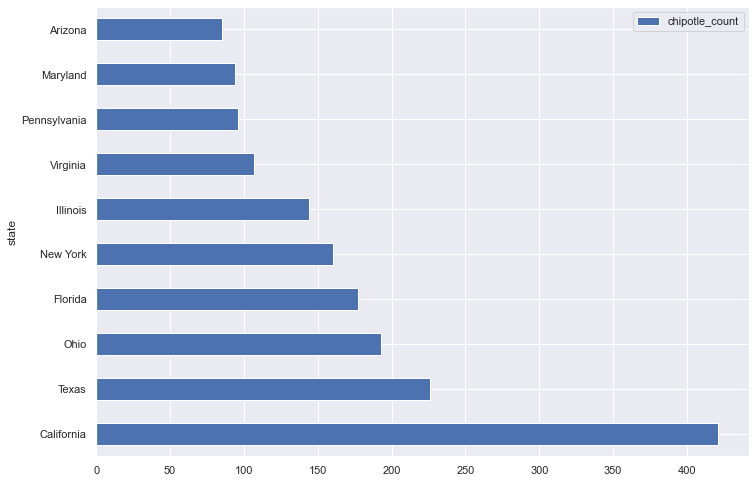

In [612]:
chipotle_by_state.sort_values('chipotle_count', ascending=False)[:10].plot.barh() #States with the most chipotles

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

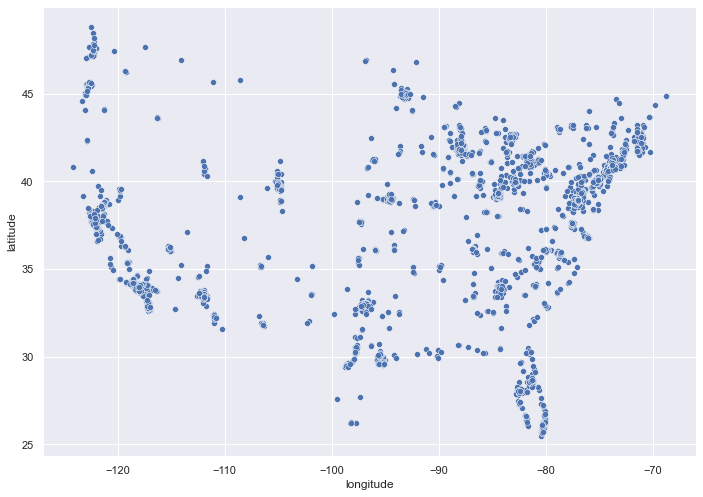

In [613]:
sns.scatterplot(data=chipotle,x="longitude",y="latitude")

## Shapefiles stuff

In [614]:
usa = geopandas.read_file('../shapefiles/2017_us_state/tl_2017_us_state.shp')

In [615]:
usa.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


In [616]:
usa.REGION.value_counts()

3    17
4    13
2    12
1     9
9     5
Name: REGION, dtype: int64

In [617]:
usa.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

In [618]:
usa = usa.to_crs("EPSG:4326")

<AxesSubplot:>

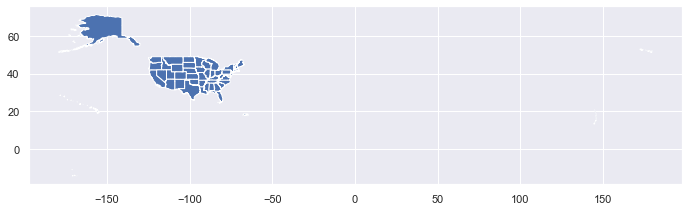

In [619]:
usa.plot()

In [620]:
gdf = geopandas.GeoDataFrame(
    chipotle, geometry=geopandas.points_from_xy(chipotle.longitude, chipotle.latitude))

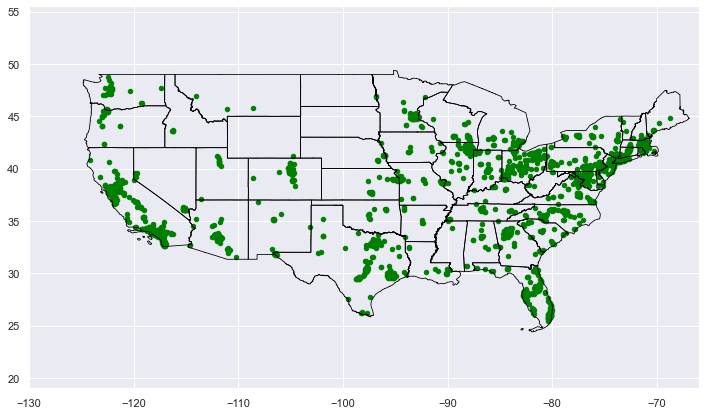

In [621]:
fig = plt.figure(1, figsize=(12,9)) 
ax = fig.add_subplot()

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-130, -66)
ax.set_ylim(19, 55.5)
usa.boundary.plot(ax=ax, color='black', linewidth=.8)
gdf.plot(ax=ax, color='green', markersize=20)


plt.show()


In [622]:
# Convertir to geopandas
gdf = geopandas.GeoDataFrame(
    chipotle, geometry=geopandas.points_from_xy(chipotle.longitude, chipotle.latitude))

In [623]:
gdf.head()

,state,location,address,latitude,longitude,geometry
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328,POINT (-85.48733 32.60681)
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756,POINT (-86.80276 33.50972)
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437,POINT (-86.64744 33.59558)
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279,POINT (-86.69828 33.42258)
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220,POINT (-86.84122 34.15413)


<AxesSubplot:>

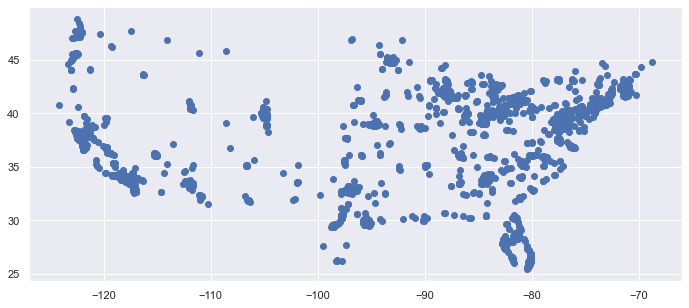

In [624]:
gdf.plot()

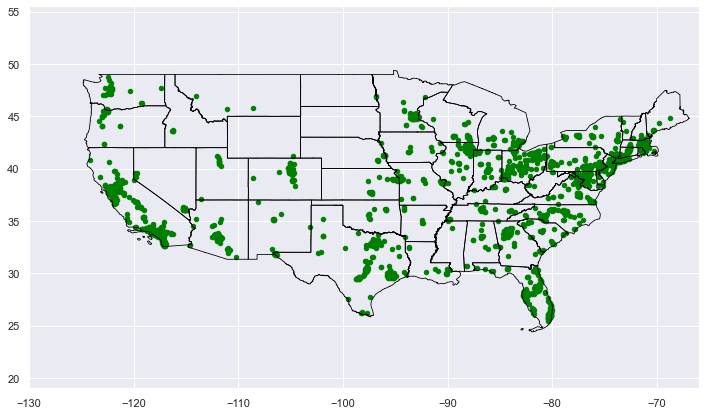

In [625]:
fig = plt.figure(1, figsize=(12,9)) 
ax = fig.add_subplot()

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-130, -66)
ax.set_ylim(19, 55.5)
usa.boundary.plot(ax=ax, color='black', linewidth=.8)
gdf.plot(ax=ax, color='green', markersize=20)



plt.show()


# Clustering

> Affinity Propagation / https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html#sklearn.cluster.AffinityPropagation

### __Steps__ :

1. Make new dataframe with relevant metrics
2. Normalize or not
3. renaming if normalized
4. fit a cluster object to the newly created dataset with a predetermined number of cluster
5. recuperate cluster.cluster_centers_
6. add cluster index to dataframe
7. visualize your cluster

In [626]:
np_long = np.array(gdf.longitude.values)
np_lat = np.array(gdf.latitude.values)
np_euclidian_distance = np.sqrt(sum(np.square(np_long-np_lat)))

In [627]:
preference = -1*np_euclidian_distance

In [628]:
preference

-6719.413157883625

In [629]:
gdf.shape

(2629, 6)

In [630]:
chip_metrics = chipotle[["latitude","longitude"]]

In [632]:
from sklearn.cluster import AffinityPropagation

In [633]:
affinityProp = AffinityPropagation(damping=0.92,verbose=True, random_state=42)#,preference=preference

In [634]:
affinityProp.fit(gdf[["longitude","latitude"]])

Converged after 67 iterations.


AffinityPropagation(damping=0.92, random_state=42, verbose=True)

In [635]:
centers = affinityProp.cluster_centers_

In [636]:
centers

array([[ -87.55362089,   33.21066867],
       [-111.89998219,   33.30528109],
       [-121.74884972,   37.96126018],
       [-117.95886346,   33.91679033],
       [-105.08089756,   39.66072835],
       [ -81.73009849,   28.5456987 ],
       [ -80.32448515,   26.14989882],
       [ -84.3422444 ,   34.0439237 ],
       [ -87.93955009,   41.90128794],
       [ -76.99167197,   38.80364579],
       [ -71.59159667,   42.338815  ],
       [ -93.34888707,   44.93177129],
       [ -94.24831717,   39.02587501],
       [-115.04344937,   36.06314949],
       [ -74.32950032,   40.71862732],
       [-106.74361805,   32.31489248],
       [ -80.56364479,   35.00922581],
       [ -84.330662  ,   39.440073  ],
       [ -82.6715406 ,   41.4163382 ],
       [ -80.4501641 ,   41.2347635 ],
       [ -97.0390026 ,   33.1305398 ],
       [ -95.79278617,   29.78736833],
       [-111.9994683 ,   41.1782739 ],
       [-122.2925394 ,   47.14671835]])

In [637]:
#add cluster index to dataframe
cluster_labels = pd.Series(affinityProp.labels_, name='cluster')

In [638]:
cluster_labels

0        7
1        0
2        0
3        0
4        0
        ..
2624     8
2625     8
2626    11
2627    11
2628     4
Name: cluster, Length: 2629, dtype: int64

In [639]:
aff_frame = chipotle[["latitude","longitude","state","location","address"]].join(cluster_labels.to_frame())

In [640]:
palette = ["#00004c",
"#0000ff",
"#F0A868",
"#ff0000",
"#7f0000",
'#508CA4','#EE99AC','#C03028']

In [641]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

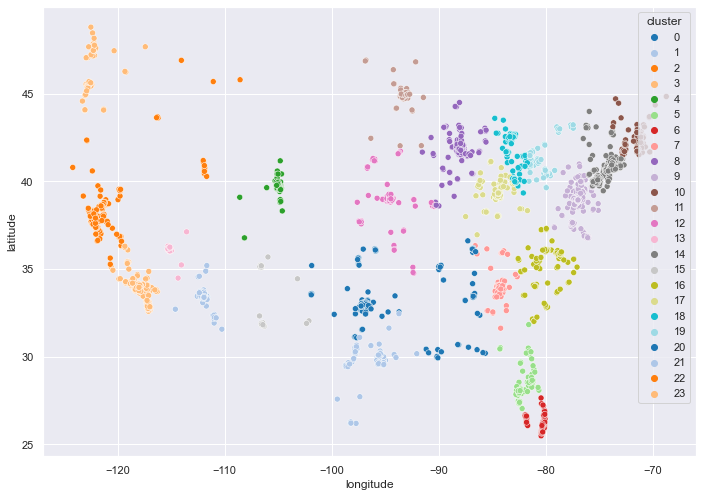

In [642]:
sns.scatterplot(data=aff_frame,x="longitude",y="latitude",hue="cluster",palette="tab20")#

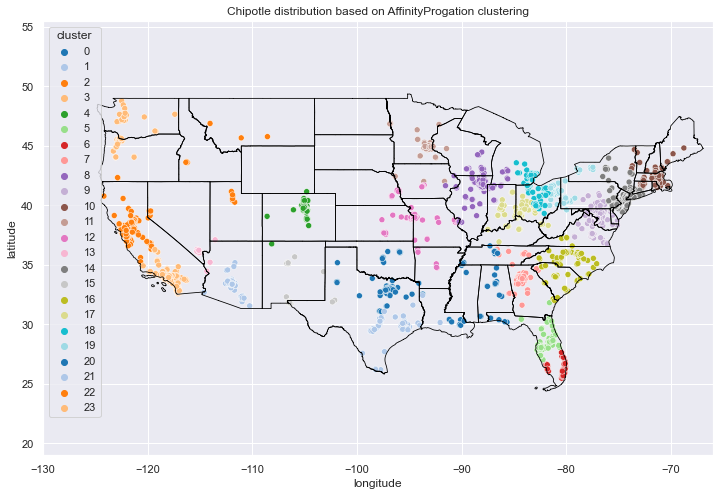

In [643]:
fig = plt.figure(1, figsize=(12,9)) 
ax = fig.add_subplot()

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-130, -66)
ax.set_ylim(19, 55.5)
usa.boundary.plot(ax=ax, color='black', linewidth=.8)
sns.scatterplot(data=aff_frame,x="longitude",y="latitude",hue="cluster",palette="tab20")#

plt.title("Chipotle distribution based on AffinityProgation clustering")
plt.savefig("../plots/chips_affinity_propagation.jpg",dpi=100)
plt.show()


# Choose a centroid to live

In [644]:
#calculer le cluster avec la plus grand densité de chipotle 
#steps
#trouver le plus petit cluster

In [645]:
aff_frame.head()

,latitude,longitude,state,location,address,cluster
0,32.606813,-85.487328,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",7
1,33.509721,-86.802756,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",0
2,33.595581,-86.647437,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",0
3,33.422582,-86.698279,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",0
4,34.154134,-86.841220,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",0


In [646]:
import haversine as hs
from haversine import Unit

In [647]:
def get_distance_meters(p1,p2):
    return hs.haversine(p1,p2,unit=Unit.METERS)

In [648]:
centers = affinityProp.cluster_centers_

In [649]:
centers

array([[ -87.55362089,   33.21066867],
       [-111.89998219,   33.30528109],
       [-121.74884972,   37.96126018],
       [-117.95886346,   33.91679033],
       [-105.08089756,   39.66072835],
       [ -81.73009849,   28.5456987 ],
       [ -80.32448515,   26.14989882],
       [ -84.3422444 ,   34.0439237 ],
       [ -87.93955009,   41.90128794],
       [ -76.99167197,   38.80364579],
       [ -71.59159667,   42.338815  ],
       [ -93.34888707,   44.93177129],
       [ -94.24831717,   39.02587501],
       [-115.04344937,   36.06314949],
       [ -74.32950032,   40.71862732],
       [-106.74361805,   32.31489248],
       [ -80.56364479,   35.00922581],
       [ -84.330662  ,   39.440073  ],
       [ -82.6715406 ,   41.4163382 ],
       [ -80.4501641 ,   41.2347635 ],
       [ -97.0390026 ,   33.1305398 ],
       [ -95.79278617,   29.78736833],
       [-111.9994683 ,   41.1782739 ],
       [-122.2925394 ,   47.14671835]])

In [650]:
d = {"longitude":centers[0:,0],"latitude":centers[:,1]}

In [651]:
center_df = pd.DataFrame(data=d)

In [652]:
center_df

,longitude,latitude
0,-87.553621,33.210669
1,-111.899982,33.305281
2,-121.748850,37.961260
3,-117.958863,33.916790
4,-105.080898,39.660728
5,-81.730098,28.545699
6,-80.324485,26.149899
7,-84.342244,34.043924
8,-87.939550,41.901288
9,-76.991672,38.803646


In [653]:
i = 0
for longitude, latitude in centers:
    filter_cluster = (aff_frame['cluster'] == i)
    aff_frame.loc[filter_cluster, "distance_meters"] = aff_frame[filter_cluster].apply(lambda r: get_distance_meters((r['latitude'],r['longitude']), (latitude, longitude)), axis=1)
    i += 1

In [654]:
aff_frame.head(1)

,latitude,longitude,state,location,address,cluster,distance_meters
0,32.606813,-85.487328,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",7,191972.343305


In [655]:
def isinfto100km(float_data):
    if float_data <100000:
        return 1
    return 0
def isinfto150km(float_data):
    if float_data <150000:
        return 1
    return 0

In [656]:
aff_frame["inf_to_100km"] = aff_frame["distance_meters"].apply(isinfto100km)
aff_frame["inf_to_150km"] = aff_frame["distance_meters"].apply(isinfto150km)

In [657]:
aff_frame.head(1)

,latitude,longitude,state,location,address,cluster,distance_meters,inf_to_100km,inf_to_150km
0,32.606813,-85.487328,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",7,191972.343305,0,0


In [658]:
inf100 = aff_frame.loc[aff_frame["inf_to_100km"]==1]

In [659]:
type(inf100)

pandas.core.frame.DataFrame

In [660]:
inf150 = aff_frame.loc[aff_frame["inf_to_150km"]==1]

In [661]:
#inf100.groupby("cluster").sum()

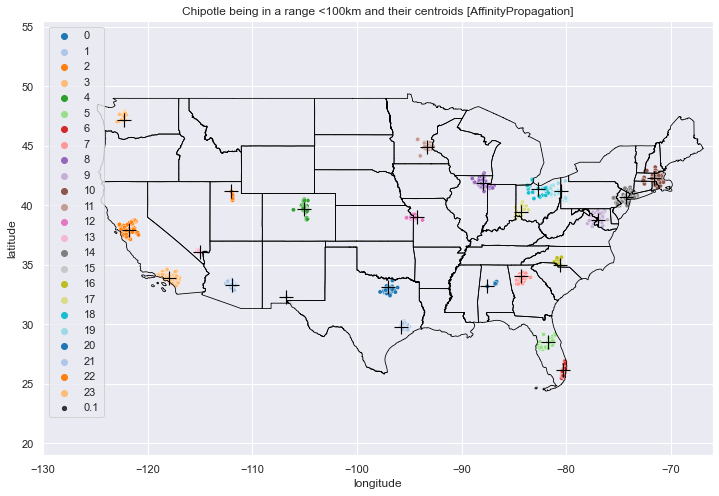

In [662]:

fig = plt.figure(1, figsize=(12,9)) 
ax = fig.add_subplot()

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000



ax.set_xlim(-130, -66)
ax.set_ylim(19, 55.5)
usa.boundary.plot(ax=ax, color='black', linewidth=.8)

sns.scatterplot(data=inf100,x="longitude",y="latitude",hue="cluster",palette="tab20",size=0.1)
sns.scatterplot(data=center_df,x="longitude",y="latitude",s=200,marker="+",color="black")

plt.title("Chipotle being in a range <100km and their centroids [AffinityPropagation]")
plt.savefig("../plots/chips_affinity_propagation_inf100.jpg",dpi=100)
plt.show()

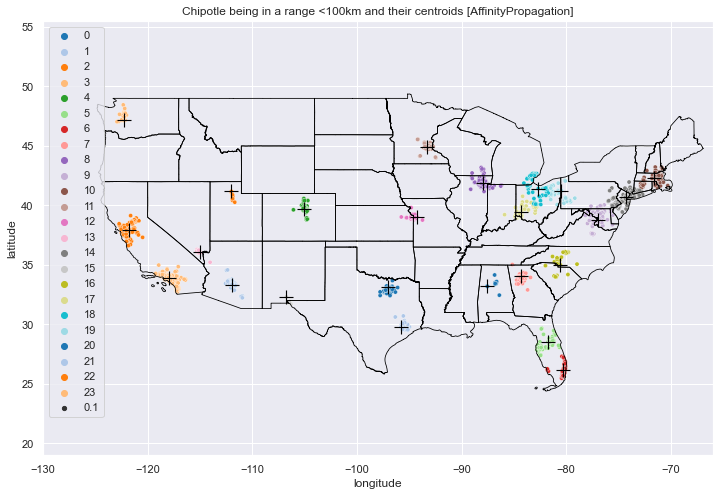

In [663]:
fig = plt.figure(1, figsize=(12,9)) 
ax = fig.add_subplot()

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000



ax.set_xlim(-130, -66)
ax.set_ylim(19, 55.5)
usa.boundary.plot(ax=ax, color='black', linewidth=.8)

sns.scatterplot(data=inf150,x="longitude",y="latitude",hue="cluster",palette="tab20",size=0.1)
sns.scatterplot(data=center_df,x="longitude",y="latitude",s=200,marker="+",color="black")

plt.title("Chipotle being in a range <100km and their centroids [AffinityPropagation]")
plt.savefig("../plots/chips_affinity_propagation_inf150.jpg",dpi=100)
plt.show()

# Tests

In [664]:
def cali(cluster):
    if cluster == 2 or cluster ==3:
        return 1
    return 0

In [665]:
inf100["in_california"] = inf100["cluster"].apply(cali)

<ipython-input-665-ef53df1db695>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inf100["in_california"] = inf100["cluster"].apply(cali)


In [666]:
cali = usa[usa['NAME'] == 'California']
cali_clusters = inf100.loc[inf100["cluster"]==2]# inf100["cluster"]==3]

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

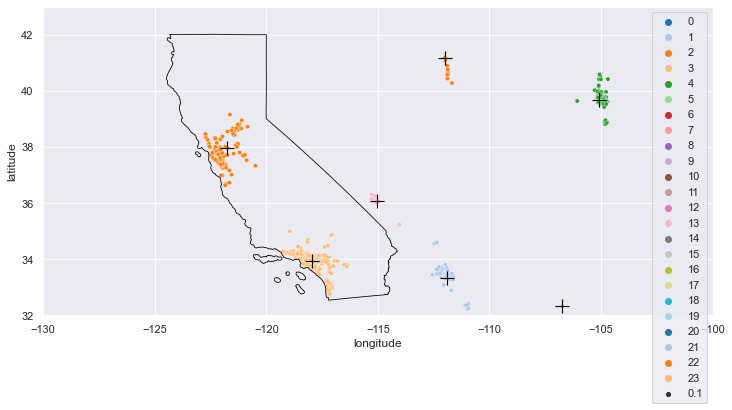

In [667]:
fig = plt.figure(1, figsize=(12,9)) 
ax = fig.add_subplot()


ax.set_xlim(-130, -100)
ax.set_ylim(32, 43)
cali.boundary.plot(ax=ax, color='black', linewidth=.8)

sns.scatterplot(data=inf150,x="longitude",y="latitude",hue="cluster",palette="tab20",size=0.1)
sns.scatterplot(data=center_df,x="longitude",y="latitude",s=200,marker="+",color="black")
